<a href="https://colab.research.google.com/github/VivianeMatosOliveira/Curso_Analista_Dados/blob/main/Exercicios/module_13_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

In [ ]:
import requests
from requests.exceptions import HTTPError

def crawl_website(url: str) -> str:

  try:
    resposta = requests.get(url)
    resposta.raise_for_status()
  except HTTPError as exc:
    print(exc)
  else:
    return resposta.text

conteudo = None
URL = 'https://static.lms.ebaconline.com.br/content-files/8c8d1912-fa5e-4612-b7f6-568301a125bc/original.xml'
conteudo = crawl_website(url=URL)
print(conteudo)

<?xml version="1.0" encoding="utf-8" ?>
<ESTADOS>
	<ESTADO>
		<ID>1</ID>
		<NOME>ACRE</NOME>
		<IDCAPITAL>16</IDCAPITAL>
		<SIGLA>AC</SIGLA>
		<REGIAO>NORTE</REGIAO>
	</ESTADO>
	<ESTADO>
		<ID>2</ID>
		<NOME>ALAGOAS</NOME>
		<IDCAPITAL>68</IDCAPITAL>
		<SIGLA>AL</SIGLA>
		<REGIAO>NORDESTE</REGIAO>
	</ESTADO>
	<ESTADO>
		<ID>3</ID>
		<NOME>AMAPA</NOME>
		<IDCAPITAL>131</IDCAPITAL>
		<SIGLA>AP</SIGLA>
		<REGIAO>NORTE</REGIAO>
	</ESTADO>
	<ESTADO>
		<ID>4</ID>
		<NOME>AMAZONAS</NOME>
		<IDCAPITAL>178</IDCAPITAL>
		<SIGLA>AM</SIGLA>
		<REGIAO>NORTE</REGIAO>
	</ESTADO>
	<ESTADO>
		<ID>5</ID>
		<NOME>BAHIA</NOME>
		<IDCAPITAL>536</IDCAPITAL>
		<SIGLA>BA</SIGLA>
		<REGIAO>NORDESTE</REGIAO>
	</ESTADO>
	<ESTADO>
		<ID>6</ID>
		<NOME>CEARA</NOME>
		<IDCAPITAL>676</IDCAPITAL>
		<SIGLA>CE</SIGLA>
		<REGIAO>NORDESTE</REGIAO>
	</ESTADO>
	<ESTADO>
		<ID>7</ID>
		<NOME>DISTRITO FEDERAL</NOME>
		<IDCAPITAL>916</IDCAPITAL>
		<SIGLA>DF</SIGLA>
		<REGIAO>CENTRO-OESTE</REGIAO>
	</ESTADO>
	<ESTADO>
		<ID>8<

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [ ]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(conteudo, 'lxml')

In [ ]:
# visualize os resultados
nomes_estado = fonte.find_all('nome')
print(nomes_estado)

[<nome>ACRE</nome>, <nome>ALAGOAS</nome>, <nome>AMAPA</nome>, <nome>AMAZONAS</nome>, <nome>BAHIA</nome>, <nome>CEARA</nome>, <nome>DISTRITO FEDERAL</nome>, <nome>ESPIRITO SANTO</nome>, <nome>GOIAS</nome>, <nome>MARANHAO</nome>, <nome>MATO GROSSO</nome>, <nome>MATO GROSSO DO SUL</nome>, <nome>PARA</nome>, <nome>PARAIBA</nome>, <nome>PARANA</nome>, <nome>PERNAMBUCO</nome>, <nome>PIAUI</nome>, <nome>RIO DE JANEIRO</nome>, <nome>RIO GRANDE DO NORTE</nome>, <nome>RIO GRANDE DO SUL</nome>, <nome>RONDONIA</nome>, <nome>RORAIMA</nome>, <nome>SANTA CATARINA</nome>, <nome>SAO PAULO</nome>, <nome>SERGIPE</nome>, <nome>TOCANTINS</nome>, <nome>MINAS GERAIS</nome>]


In [ ]:
estados = []

for nome_estado  in nomes_estado:
  estados.append(nome_estado.get_text( ))
print(estados)

['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA', 'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIAS', 'MARANHAO', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARA', 'PARAIBA', 'PARANA', 'PERNAMBUCO', 'PIAUI', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDONIA', 'RORAIMA', 'SANTA CATARINA', 'SAO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS']


In [ ]:
siglas_estados = fonte.find_all('sigla')
print(siglas_estados)

[<sigla>AC</sigla>, <sigla>AL</sigla>, <sigla>AP</sigla>, <sigla>AM</sigla>, <sigla>BA</sigla>, <sigla>CE</sigla>, <sigla>DF</sigla>, <sigla>ES</sigla>, <sigla>GO</sigla>, <sigla>MA</sigla>, <sigla>MT</sigla>, <sigla>MS</sigla>, <sigla>PA</sigla>, <sigla>PB</sigla>, <sigla>PR</sigla>, <sigla>PE</sigla>, <sigla>PI</sigla>, <sigla>RJ</sigla>, <sigla>RN</sigla>, <sigla>RS</sigla>, <sigla>RO</sigla>, <sigla>RR</sigla>, <sigla>SC</sigla>, <sigla>SP</sigla>, <sigla>SE</sigla>, <sigla>TO</sigla>, <sigla>MG</sigla>]


In [ ]:
siglas = []

for sigla  in siglas_estados:
  siglas.append(sigla.get_text( ))
print(siglas)

['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO', 'MG']


In [ ]:
regiao = fonte.find_all('regiao')
print(regiao)

[<regiao>NORTE</regiao>, <regiao>NORDESTE</regiao>, <regiao>NORTE</regiao>, <regiao>NORTE</regiao>, <regiao>NORDESTE</regiao>, <regiao>NORDESTE</regiao>, <regiao>CENTRO-OESTE</regiao>, <regiao>SUDESTE</regiao>, <regiao>CENTRO-OESTE</regiao>, <regiao>NORDESTE</regiao>, <regiao>CENTRO-OESTE</regiao>, <regiao>CENTRO-OESTE</regiao>, <regiao>NORTE</regiao>, <regiao>NORDESTE</regiao>, <regiao>SUL</regiao>, <regiao>NORDESTE</regiao>, <regiao>NORDESTE</regiao>, <regiao>SUDESTE</regiao>, <regiao>NORDESTE</regiao>, <regiao>SUL</regiao>, <regiao>NORTE</regiao>, <regiao>NORTE</regiao>, <regiao>SUL</regiao>, <regiao>SUDESTE</regiao>, <regiao>NORDESTE</regiao>, <regiao>NORTE</regiao>, <regiao>SUDESTE</regiao>]


In [ ]:
regioes = []

for regiao  in regiao:
  regioes.append(regiao.get_text( ))
print(regioes)

['NORTE', 'NORDESTE', 'NORTE', 'NORTE', 'NORDESTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'CENTRO-OESTE', 'NORDESTE', 'CENTRO-OESTE', 'CENTRO-OESTE', 'NORTE', 'NORDESTE', 'SUL', 'NORDESTE', 'NORDESTE', 'SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'NORTE', 'SUL', 'SUDESTE', 'NORDESTE', 'NORTE', 'SUDESTE']


In [ ]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

# continue o codigo aqui

In [ ]:
import csv

with open(file='./estados-limpo.csv', mode='w', newline = "", encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo)
  escritor_csv.writerows([['estado', 'sigla','regiao']] + list (map(lambda estados,siglas,regioes: [estados,siglas,regioes],estados,siglas,regioes)))


### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [ ]:
# ler o arquivo cidades-bruto.csv

import pandas as pd
import io
from google.colab import files

#NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'


In [ ]:
arquivo_fonte = files.upload()

Saving cidades-bruto.csv to cidades-bruto.csv


In [ ]:
fonte_df = pd.read_csv(io.BytesIO(arquivo_fonte['cidades-bruto.csv']))

In [ ]:
# visualize os resultados

fonte_df.head()

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...


In [ ]:
cidades_limpos = fonte_df.query('Censo == 2010')[['UF', 'nome','Pop_est_2009', 'PIB','PIB_percapita']]

In [ ]:
cidades_limpos

,UF,nome,Pop_est_2009,PIB,PIB_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,9737,1.876289e+05,19269.679688
5562,PARANÁ,Planalto,13983,1.385535e+05,9908.709961
5563,SÃO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


In [ ]:
cidades_limpos.rename(columns={'UF': 'estado','nome':'cidade','Pop_est_2009':'populacao',}, inplace = True)

In [ ]:
cidades_limpos.columns

Index(['estado', 'cidade', 'populacao', 'PIB', 'PIB_percapita'], dtype='object')

In [ ]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

# continue o codigo aqui

In [ ]:
cidades_limpos.to_csv('cidades-limpo.csv',index= False)

### **1.3. Brasil** 

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [ ]:
# solução do exercício 1.3

In [ ]:
import pandas as pd

cidades_df = pd.read_csv('cidades-limpo.csv', sep=',')

In [ ]:
cidades_df

,estado,cidade,populacao,PIB,PIB_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
5550,SANTA CATARINA,Campo Erê,9737,1.876289e+05,19269.679688
5551,PARANÁ,Planalto,13983,1.385535e+05,9908.709961
5552,SÃO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5553,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


In [ ]:
estados_df['estado'].unique()

array(['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA',
       'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIAS', 'MARANHAO',
       'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARA', 'PARAIBA', 'PARANA',
       'PERNAMBUCO', 'PIAUI', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE',
       'RIO GRANDE DO SUL', 'RONDONIA', 'RORAIMA', 'SANTA CATARINA',
       'SAO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS'], dtype=object)

In [ ]:
estados_df = pd.read_csv('estados-limpo.csv', sep=',')

In [ ]:
estados_df

In [ ]:
cidades_df['estado'].unique() #verificando valores unicos para coluna estado

array(['BAHIA', 'RIO GRANDE DO SUL', 'ESPIRITO SANTO', 'MINAS GERAIS',
       'PIAUÍ', 'GOIÁS', 'PERNAMBUCO', 'PARÁ', 'SERGIPE', 'SÃO PAULO',
       'PARAÍBA', 'TOCANTINS', 'AMAZONAS', 'SANTA CATARINA', 'CEARÁ',
       'RORAIMA', 'MARANHÃO', 'RIO DE JANEIRO', 'MATO GROSSO', 'PARANÁ',
       'ALAGOAS', 'MATO GROSSO DO SUL', 'ACRE', 'RIO GRANDE DO NORTE',
       'RONDÔNIA', 'AMAPÁ', 'DISTRITO FEDERAL'], dtype=object)

In [ ]:
def corrigir_estados(estado):   #retirando acentuação
    estado = estado.replace('Ã', 'A').replace('Í', 'I').replace('Á', 'A').replace('Ô','O')
    return estado

In [ ]:
cidades_df['estado'] = cidades_df['estado'].apply(corrigir_estados)  # aplicando no df
cidades_df

In [ ]:
cidades_df['estado'].unique()

array(['BAHIA', 'RIO GRANDE DO SUL', 'ESPIRITO SANTO', 'MINAS GERAIS',
       'PIAUI', 'GOIAS', 'PERNAMBUCO', 'PARA', 'SERGIPE', 'SAO PAULO',
       'PARAIBA', 'TOCANTINS', 'AMAZONAS', 'SANTA CATARINA', 'CEARA',
       'RORAIMA', 'MARANHAO', 'RIO DE JANEIRO', 'MATO GROSSO', 'PARANA',
       'ALAGOAS', 'MATO GROSSO DO SUL', 'ACRE', 'RIO GRANDE DO NORTE',
       'RONDONIA', 'AMAPA', 'DISTRITO FEDERAL'], dtype=object)

In [ ]:
brasil = pd.merge(left=estados_df,right=cidades_df, on='estado', how='inner' )

In [ ]:
brasil

,estado,sigla,regiao,cidade,populacao,PIB,PIB_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,14275,1.091819e+05,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,19697,2.171539e+05,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,5662,4.834730e+04,8538.910156
3,ACRE,AC,NORTE,Epitaciolândia,14224,1.296411e+05,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,7505,6.147873e+04,8191.700195
...,...,...,...,...,...,...,...
5550,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,3015,1.600776e+04,5309.370117
5551,MINAS GERAIS,MG,SUDESTE,Nova Ponte,12504,4.681494e+05,37439.968750
5552,MINAS GERAIS,MG,SUDESTE,São Gonçalo do Sapucaí,23627,2.886858e+05,12218.469727
5553,MINAS GERAIS,MG,SUDESTE,Barbacena,128572,1.335420e+06,10386.549805


In [ ]:
print(brasil.isna().sum()) #verificando se há valores nulos

estado           0
sigla            0
regiao           0
cidade           0
populacao        0
PIB              0
PIB_percapita    0
dtype: int64


In [ ]:
brasil.to_csv('brasil.csv',index= False)

## 2\. Data Analytics

### **2.1. DataFrame** 

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [ ]:
# solução do exercício 2.1

In [ ]:
import pandas as pd

brasil_df = pd.read_csv('brasil.csv', sep=',')

In [ ]:
brasil.head()

,estado,sigla,regiao,cidade,populacao,PIB,PIB_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,14275,109181.867188,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,19697,217153.859375,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,5662,48347.300781,8538.910156
3,ACRE,AC,NORTE,Epitaciolândia,14224,129641.093750,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,7505,61478.730469,8191.700195


### **2.2. Analise** 

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
brasil_df.sort_values(by=['populacao'], ascending=False).head(10)

,estado,sigla,regiao,cidade,populacao,PIB,PIB_percapita
4403,SAO PAULO,SP,SUDESTE,São Paulo,11037593,389317152.0,35271.929688
2747,RIO DE JANEIRO,RJ,SUDESTE,Rio de Janeiro,6186710,175739344.0,28405.949219
246,BAHIA,BA,NORDESTE,Salvador,2998056,32824228.0,10948.500000
802,DISTRITO FEDERAL,DF,CENTRO-OESTE,Brasília,2606885,131487264.0,50438.460938
766,CEARA,CE,NORDESTE,Fortaleza,2505552,31789186.0,12687.500000
5447,MINAS GERAIS,MG,SUDESTE,Belo Horizonte,2452617,44595204.0,18182.699219
2056,PARANA,PR,SUL,Curitiba,1851215,45762420.0,24720.210938
142,AMAZONAS,AM,NORTE,Manaus,1738641,40486108.0,23286.060547
2446,PERNAMBUCO,PE,NORDESTE,Recife,1561659,24835340.0,15903.179688
1687,PARA,PA,NORTE,Belém,1437600,16526989.0,11496.240234


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
regiao_nordeste =(brasil_df["regiao"] == "NORDESTE")
regiao_nordeste

0       False
1       False
2       False
3       False
4       False
        ...  
5550    False
5551    False
5552    False
5553    False
5554    False
Name: regiao, Length: 5555, dtype: bool

In [ ]:
menor_pib_nordeste = brasil_df.sort_values(by=['PIB_percapita'], ascending=True)[regiao_nordeste].head(5)
menor_pib_nordeste

<ipython-input-95-1d2c6528b741>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  menor_pib_nordeste = brasil_df.sort_values(by=['PIB_percapita'], ascending=True)[regiao_nordeste].head(5)


,estado,sigla,regiao,cidade,populacao,PIB,PIB_percapita
1319,MARANHAO,MA,NORDESTE,São Vicente Ferrer,20463,39492.960938,1929.969971
1214,MARANHAO,MA,NORDESTE,Cajapió,10337,22781.035156,2203.830078
2512,PIAUI,PI,NORDESTE,Dom Inocêncio,10795,25457.230469,2358.239990
1338,MARANHAO,MA,NORDESTE,Timbiras,26909,63724.851562,2368.159912
1235,MARANHAO,MA,NORDESTE,Axixá,15203,36745.226562,2416.969971


In [ ]:
# código para responder a pergunta


 - Quais são as 15 cidades com maior PIB do estado de São Paulo?

In [ ]:
estado_sp =(brasil_df["estado"] == "SAO PAULO")
estado_sp

0       False
1       False
2       False
3       False
4       False
        ...  
5550    False
5551    False
5552    False
5553    False
5554    False
Name: estado, Length: 5555, dtype: bool

In [ ]:
maior_pib_sp = brasil_df.sort_values(by=['PIB', 'cidade'], ascending=False)[estado_sp].head(15)
maior_pib_sp

<ipython-input-99-076d169c7042>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  maior_pib_sp = brasil_df.sort_values(by=['PIB', 'cidade'], ascending=False)[estado_sp].head(15) # não está trazendo dados do estado de São PAulo


,estado,sigla,regiao,cidade,populacao,PIB,PIB_percapita
4403,SAO PAULO,SP,SUDESTE,São Paulo,11037593,389317152.0,35271.929688
4355,SAO PAULO,SP,SUDESTE,Guarulhos,1299283,32473828.0,24993.650391
4472,SAO PAULO,SP,SUDESTE,Campinas,1064669,31654720.0,29731.980469
4238,SAO PAULO,SP,SUDESTE,Osasco,718646,31616452.0,43994.468750
3942,SAO PAULO,SP,SUDESTE,São Bernardo do Campo,810979,28935768.0,35680.050781
4476,SAO PAULO,SP,SUDESTE,Barueri,270173,26908070.0,99595.703125
3900,SAO PAULO,SP,SUDESTE,Santos,417098,22546134.0,54054.761719
4126,SAO PAULO,SP,SUDESTE,São José dos Campos,615871,22018042.0,35751.058594
4146,SAO PAULO,SP,SUDESTE,Jundiaí,349929,16585137.0,47395.718750
3948,SAO PAULO,SP,SUDESTE,Santo André,673396,14709603.0,21843.910156


In [ ]:
# código para responder a pergunta

 - Qual é o PIB do estado de Santa Catarina?

In [ ]:
estado_sc =(brasil_df["estado"] == "SANTA CATARINA")
estado_sc

0       False
1       False
2       False
3       False
4       False
        ...  
5550    False
5551    False
5552    False
5553    False
5554    False
Name: estado, Length: 5555, dtype: bool

In [ ]:
pib_sc = brasil_df[estado_sc]['PIB'].agg('sum')
print('O PIB do estado de Santa Catarina é R$',pib_sc)

O PIB do estado de Santa Catarina é R$ 129806256.75195317


 - Qual é o população da região sul?

In [ ]:
# código para responder a pergunta

In [ ]:
regiao_sul =(brasil_df["regiao"] == "SUL")
regiao_sul

0       False
1       False
2       False
3       False
4       False
        ...  
5550    False
5551    False
5552    False
5553    False
5554    False
Name: regiao, Length: 5555, dtype: bool

In [ ]:
pop_sul = brasil_df[regiao_sul]['populacao'].agg('sum')
print('A população da região sul é:',pop_sul)

A população da região sul é: 27719118


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
estado_mts =(brasil_df["estado"] == "MATO GROSSO DO SUL")
estado_mts

0       False
1       False
2       False
3       False
4       False
        ...  
5550    False
5551    False
5552    False
5553    False
5554    False
Name: estado, Length: 5555, dtype: bool

In [ ]:
pip_medio_mts = brasil_df[estado_mts][['PIB_percapita','estado']].groupby('estado').agg('mean')
pip_medio_mts

,PIB_percapita
estado,
MATO GROSSO DO SUL,14458.89686


In [ ]:
# código para responder a pergunta

 - Qual é a população do Brasil?

In [ ]:
populacao_brasil = brasil_df['populacao'].agg('sum')

print('A população do Brasil é:',populacao_brasil)

A população do Brasil é: 191176146


### **2.3. Visualização** 

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [ ]:
cidade_menos_pop = brasil_df.sort_values(by=['populacao'], ascending=True).head(10)
cidade_menos_pop

,estado,sigla,regiao,cidade,populacao,PIB,PIB_percapita
4356,SAO PAULO,SP,SUDESTE,Borá,837,50332.714844,60134.660156
5197,MINAS GERAIS,MG,SUDESTE,Serra da Saudade,890,10433.846680,11723.419922
1097,GOIAS,GO,CENTRO-OESTE,Anhanguera,1018,8194.404297,8049.509766
1436,MATO GROSSO,MT,CENTRO-OESTE,Araguainha,1115,11522.663086,10334.230469
4379,SAO PAULO,SP,SUDESTE,Nova Castilho,1122,26578.259766,23688.289062
4564,TOCANTINS,TO,NORTE,Oliveira de Fátima,1129,11591.949219,10267.450195
2603,PIAUI,PI,NORDESTE,Miguel Leão,1212,8365.680664,6902.379883
4707,MINAS GERAIS,MG,SUDESTE,Cedro do Abaeté,1221,10221.856445,8371.709961
1877,PARAIBA,PB,NORDESTE,Parari,1266,9518.777344,7518.779785
4598,TOCANTINS,TO,NORTE,Chapada de Areia,1273,11322.538086,8894.370117


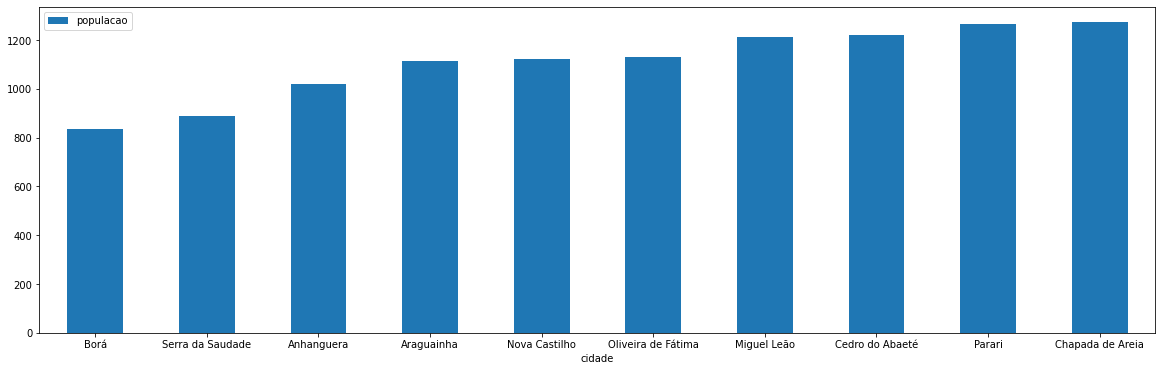

In [ ]:
grafico = cidade_menos_pop.plot.bar(x='cidade', y='populacao', rot=0, figsize=(20, 6))

In [ ]:
# código para gerar a visualização

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

In [ ]:
# código para gerar a visualização

In [ ]:
pop_regiao = brasil_df[['populacao','regiao']].groupby('regiao').agg('sum')
pop_regiao

,populacao
regiao,
CENTRO-OESTE,13773930
NORDESTE,53491940
NORTE,15359608
SUDESTE,80831550
SUL,27719118


Text(0.5, 1.0, 'População por Região')

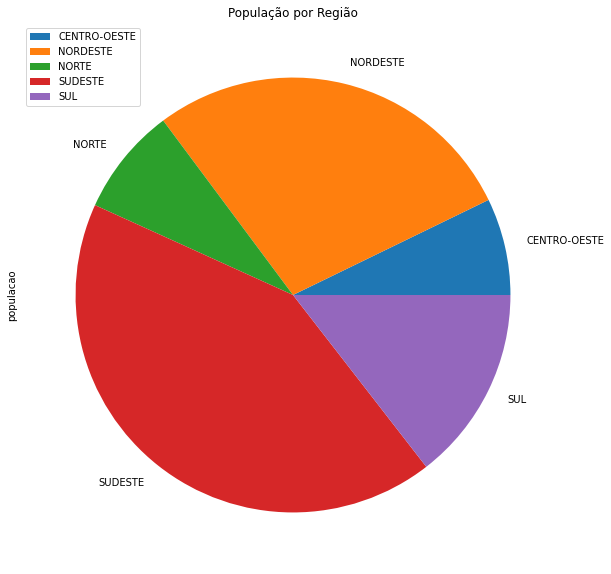

In [ ]:
grafico = pop_regiao.plot.pie(y='populacao', figsize=(15, 10))
grafico.set_title("População por Região") 

In [ ]:
dir(dict)